Suppose a coin has probability $p$ of falling heads up. If we flip the coin many times, we would expect the proportion of heads to be near $p$. We will make this formal later. Take $p = 0.3$ and $n = 1000$ and simulate $n$ coin flips. Plot the proportion of heads as a function of n. Repeat for $p = 0.03$.

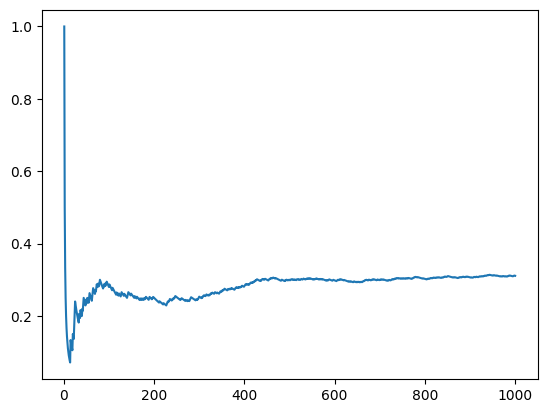

30pct_1000


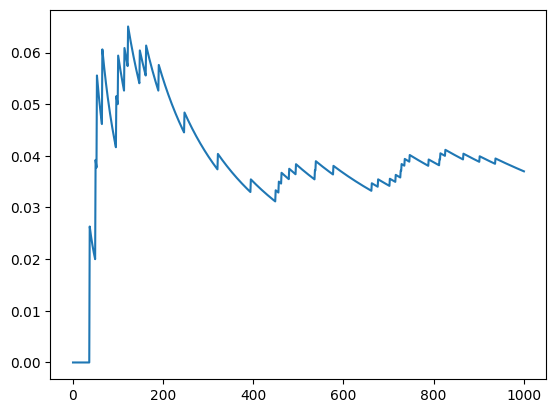

3pct_1000


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math

def Ex1_21(p = 0.3, n = 1000, draw = True, save = False):
    rand = np.random.random(size = 1000)
    _range = np.arange(1, n + 1)

    result = np.cumsum(rand < p) / _range

    fig, ax = plt.subplots()

    ax.plot(_range, result)

    if draw:
        plt.show()

    if save:
        # p = 0.213, n = 1000 -> 21pct_1000
        str_form = f"{math.floor(p * 100)}pct_{n}"
        fig.savefig(f"Ex1_21-{str_form}.png")

Ex1_21(p = 0.3, draw = True, save = True)
Ex1_21(p = 0.03, draw = True, save = True)

In [68]:
def Ex1_22(p = 0.3, n = 1000, num_iter = 100):
    sum = 0
    for i in range(num_iter):
        rand = np.random.random(size = n)
        sum += np.sum(rand < p)

    mean = sum / num_iter
    expected = n * p
    delta = abs(mean - expected) / (expected)
    print(f"mean = {mean}, delta = {delta * 100:.2f}%")

for n in [10, 100, 1000]:
    Ex1_22(n = n)

mean = 2.93, delta = 2.33%
mean = 30.2, delta = 0.67%
mean = 297.83, delta = 0.72%


In [149]:
import numpy as np

labels = ['P(A)', 'P(B)', 'P(A, B)', 'P(A)P(B)', 
          'P(A, B) - P(A)P(B)']
pct_str = lambda x : f"{x * 100:.2f}%"

def Ex1_23_helper(probabilities):
    for label, prob in zip(labels, probabilities):
        print(f"\t{label}: {pct_str(prob)}")

def Ex1_23(A, B, n = 10000):
    cap = A.intersection(B)

    # rand does [) so I need to increment high to get 6
    rand = np.random.randint(low = 1, high = 6 + 1, size = n)
    prob_A = sum(np.isin(rand, list(A))) / n
    prob_B = sum(np.isin(rand, list(B))) / n
    prob_cap = sum(np.isin(rand, list(cap))) / n

    prob_prod = prob_A * prob_B

    probabilities = [prob_A, prob_B, prob_cap, prob_prod,
                     prob_cap - prob_prod]

    print("Experimental Values")
    Ex1_23_helper(probabilities)

A, B = {2, 4, 6}, {1, 2, 3, 4}
print(f"A = {A}, B = {B}, AB = {A.intersection(B)}")
print("Theoretical Values")
Ex1_23_helper([1/2, 2/3, 1/3, 1/3, 0])
Ex1_23(A, B)
print()

A, B = {1, 2, 3}, {3, 4, 5, 6}
print(f"A = {A}, B = {B}, AB = {A.intersection(B)}")
print("Theoretical Values")
Ex1_23_helper([1/2, 2/3, 1/6, 1/3, -1/6])
Ex1_23(A, B)

A = {2, 4, 6}, B = {1, 2, 3, 4}, AB = {2, 4}
Theoretical Values
	P(A): 50.00%
	P(B): 66.67%
	P(A, B): 33.33%
	P(A)P(B): 33.33%
	P(A, B) - P(A)P(B): 0.00%
Experimental Values
	P(A): 50.69%
	P(B): 67.28%
	P(A, B): 34.35%
	P(A)P(B): 34.10%
	P(A, B) - P(A)P(B): 0.25%

A = {1, 2, 3}, B = {3, 4, 5, 6}, AB = {3}
Theoretical Values
	P(A): 50.00%
	P(B): 66.67%
	P(A, B): 16.67%
	P(A)P(B): 33.33%
	P(A, B) - P(A)P(B): -16.67%
Experimental Values
	P(A): 49.61%
	P(B): 67.16%
	P(A, B): 16.77%
	P(A)P(B): 33.32%
	P(A, B) - P(A)P(B): -16.55%
